#Criando dados Ficticios de Vendas

## instalando o Faker

In [2]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from faker import Faker
import random
from random import randint
from datetime import timedelta

# Inicializando o gerador de dados fictícios para o Brasil
fake = Faker('pt_BR')

# Definindo o número de linhas
num_linhas = 30000

# Lista de cidades da região Sudeste do Brasil
cidades_sudeste = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Vitória', 'Campinas', 'Santos', 'Niterói', 'Sorocaba', 'Juiz de Fora', 'Uberlândia']

# Lista de produtos
produtos = [
    "Batom Vegan Yara - Terra Cobre",
    "Máscara Vegan Yara - Vento Preto",
    "Base Líquida Vegan Yara - Terra Natural",
    "Corretivo Vegan Yara - Nuvem Clara",
    "Blush Vegan Yara - Fogo Coral",
    "Pó Compacto Vegan Yara - Terra Bronzeada",
    "Delineador Vegan Yara - Vento Preto",
    "Sombra Vegan Yara - Terra Neutra",
    "Batom Líquido Vegan Yara - Fogo Vermelho",
    "Primer Vegan Yara - Vento Matte",
    "BB Cream Vegan Yara - Terra Média",
    "Iluminador Vegan Yara - Fogo Dourado",
    "Contorno Vegan Yara - Terra Suave",
    "Esfoliante Facial Vegan Yara - Água de Chá Verde",
    "Hidratante Facial Vegan Yara - Água de Aloe Vera",
    "Protetor Solar Vegan Yara - Terra FPS 50",
    "Demaquilante Vegan Yara - Água Suave",
    "Sabonete Facial Vegan Yara - Água Profunda",
    "Tônico Facial Vegan Yara - Vento Refrescante",
    "Sérum Facial Vegan Yara - Fogo de Vitamina C",
    "Perfume Vegan Yara - Terra Amadeirada",
    "Perfume Vegan Yara - Vento Fresco",
    "Perfume Vegan Yara - Fogo Picante",
    "Perfume Vegan Yara - Água de Coco",
    "Perfume Vegan Yara - Terra e Mar",
    "Flora Noir Vegan Yara",
    "Floresta Negra Vegan Yara"
]

# Produtos mais vendidos
produtos_mais_vendidos = ["Flora Noir Vegan Yara", "Floresta Negra Vegan Yara"]

# Gerando dados fictícios
dados = {
    "quantidade": [randint(1, 100) for _ in range(num_linhas)],
    "preço": [],
    "custo": [],
    "vendedor": [fake.name() for _ in range(num_linhas)],
    "cliente": [fake.name() for _ in range(num_linhas)],
    "pedido": [],
    "produto": [],
    "filial": [random.choice(cidades_sudeste) for _ in range(num_linhas)],
    "cidade_entrega": [random.choice(cidades_sudeste) for _ in range(num_linhas)],
    "data_venda": [],
    "data_entrega": [],
}

# Gerando números de pedidos únicos
pedidos = list(range(1000, 1000 + num_linhas))
random.shuffle(pedidos)

for _ in range(num_linhas):
    # Garantindo que o custo seja sempre menor que o dobro do preço
    custo = round(random.uniform(5.5, 50.5), 2)
    preço = round(random.uniform(custo, 2 * custo), 2)
    dados["custo"].append(custo)
    dados["preço"].append(preço)

    # Garantindo que a data de entrega seja sempre dentro de 60 dias após a data de venda
    data_venda = fake.date_between(start_date='-1y', end_date='today')
    data_entrega = data_venda + timedelta(days=randint(1, 60))
    dados["data_venda"].append(data_venda)
    dados["data_entrega"].append(data_entrega)

    # Adicionando número de pedido único
    dados["pedido"].append(pedidos[_])

    # Selecionando produto, com maior chance para os produtos mais vendidos
    if random.random() < 0.2:  # 20% de chance de ser um produto mais vendido
        produto = random.choice(produtos_mais_vendidos)
    else:
        produto = random.choice(produtos)
    dados["produto"].append(produto)

# Criando um DataFrame com os dados
df = pd.DataFrame(dados)
df.head()

,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega
0,7,13.93,13.49,Ísis Pereira,Isis Fonseca,16366,Corretivo Vegan Yara - Nuvem Clara,Rio de Janeiro,Juiz de Fora,2023-09-18,2023-10-02
1,70,36.22,18.65,Eduardo Leão,Sr. Erick da Paz,5899,Corretivo Vegan Yara - Nuvem Clara,Uberlândia,Juiz de Fora,2023-11-07,2023-12-01
2,68,49.77,38.80,Augusto Marques,Kaique Garcia,15976,Floresta Negra Vegan Yara,São Paulo,Niterói,2024-02-20,2024-03-14
3,80,12.36,7.86,Sr. Benjamin Lima,Dr. Nathan Casa Grande,27433,Perfume Vegan Yara - Água de Coco,Belo Horizonte,Sorocaba,2023-11-23,2024-01-22
4,62,45.44,34.24,Mathias Pires,Marcelo Camargo,13686,Pó Compacto Vegan Yara - Terra Bronzeada,Niterói,Uberlândia,2023-06-16,2023-07-01


#Gerando Excel das Vendas

In [4]:
df.to_excel('dados.xlsx', index=False)

# Importando o modulo files do Colab
from google.colab import files

#Efetuando o download do arquivo
files.download('dados.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Importando Dados de Vendas

In [5]:
dfVendas = pd.read_excel('dados.xlsx')
dfVendas.head()

,quantidade,preço,custo,vendedor,cliente,pedido,produto,filial,cidade_entrega,data_venda,data_entrega
0,7,13.93,13.49,Ísis Pereira,Isis Fonseca,16366,Corretivo Vegan Yara - Nuvem Clara,Rio de Janeiro,Juiz de Fora,2023-09-18,2023-10-02
1,70,36.22,18.65,Eduardo Leão,Sr. Erick da Paz,5899,Corretivo Vegan Yara - Nuvem Clara,Uberlândia,Juiz de Fora,2023-11-07,2023-12-01
2,68,49.77,38.80,Augusto Marques,Kaique Garcia,15976,Floresta Negra Vegan Yara,São Paulo,Niterói,2024-02-20,2024-03-14
3,80,12.36,7.86,Sr. Benjamin Lima,Dr. Nathan Casa Grande,27433,Perfume Vegan Yara - Água de Coco,Belo Horizonte,Sorocaba,2023-11-23,2024-01-22
4,62,45.44,34.24,Mathias Pires,Marcelo Camargo,13686,Pó Compacto Vegan Yara - Terra Bronzeada,Niterói,Uberlândia,2023-06-16,2023-07-01


In [6]:
dfVendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   quantidade      30000 non-null  int64         
 1   preço           30000 non-null  float64       
 2   custo           30000 non-null  float64       
 3   vendedor        30000 non-null  object        
 4   cliente         30000 non-null  object        
 5   pedido          30000 non-null  int64         
 6   produto         30000 non-null  object        
 7   filial          30000 non-null  object        
 8   cidade_entrega  30000 non-null  object        
 9   data_venda      30000 non-null  datetime64[ns]
 10  data_entrega    30000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 2.5+ MB


In [7]:
dfVendas.describe()

,quantidade,preço,custo,pedido,data_venda,data_entrega
count,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000
mean,50.926000,41.993591,28.008650,15999.500000,2023-12-09 20:37:29.280000,2024-01-09 15:09:10.080000
min,1.000000,5.770000,5.500000,1000.000000,2023-06-10 00:00:00,2023-06-11 00:00:00
25%,26.000000,24.087500,16.947500,8499.750000,2023-09-09 00:00:00,2023-10-10 00:00:00
50%,51.000000,40.440000,27.970000,15999.500000,2023-12-10 00:00:00,2024-01-10 00:00:00
75%,76.000000,57.270000,39.190000,23499.250000,2024-03-11 00:00:00,2024-04-11 00:00:00
max,100.000000,100.830000,50.500000,30999.000000,2024-06-09 00:00:00,2024-08-08 00:00:00
std,28.902808,21.385558,12.910117,8660.398374,NaN,NaN


In [8]:
dfVendas.dtypes

quantidade                 int64
preço                    float64
custo                    float64
vendedor                  object
cliente                   object
pedido                     int64
produto                   object
filial                    object
cidade_entrega            object
data_venda        datetime64[ns]
data_entrega      datetime64[ns]
dtype: object

#Calculando novas colunas

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Custo total do pedido

In [10]:
dfVendas['Custo Total'] = dfVendas['custo'] * dfVendas['quantidade']
dfVendas['Custo Total'].head()

0      94.43
1    1305.50
2    2638.40
3     628.80
4    2122.88
Name: Custo Total, dtype: float64

##Valor de Venda do Pedido

In [11]:
dfVendas['Valor de Venda'] = dfVendas['preço'] * dfVendas['quantidade']
dfVendas['Valor de Venda'].head()

0      97.51
1    2535.40
2    3384.36
3     988.80
4    2817.28
Name: Valor de Venda, dtype: float64

##Lucro do Pedido

In [12]:
dfVendas['Lucro'] = dfVendas['Valor de Venda'] - dfVendas['Custo Total']
dfVendas['Lucro'].head()

0       3.08
1    1229.90
2     745.96
3     360.00
4     694.40
Name: Lucro, dtype: float64

#Agrupando Dados

In [13]:
print('\nVendas Por Vendedor')
VendasPorVendedor = dfVendas.groupby('vendedor')['Valor de Venda'].sum()
VendasPorVendedor


Vendas Por Vendedor


vendedor
Agatha Abreu           791.70
Agatha Albuquerque    3325.88
Agatha Borges          995.00
Agatha Caldeira       1910.80
Agatha Camargo        6708.78
                       ...   
Ísis da Costa         3173.76
Ísis da Mata           825.51
Ísis da Rocha         9707.72
Ísis da Rosa          6384.24
Ísis das Neves        1382.95
Name: Valor de Venda, Length: 21546, dtype: float64

In [14]:
print('\nLucro Por Vendedor')
LucroPorVendedor = dfVendas.groupby('vendedor')['Lucro'].sum()
LucroPorVendedor


Lucro Por Vendedor


vendedor
Agatha Abreu           332.28
Agatha Albuquerque    1240.32
Agatha Borges          419.40
Agatha Caldeira        606.72
Agatha Camargo        2967.58
                       ...   
Ísis da Costa         1371.99
Ísis da Mata           347.34
Ísis da Rocha         3121.91
Ísis da Rosa          2647.10
Ísis das Neves         472.60
Name: Lucro, Length: 21546, dtype: float64

#Formatando Dados

In [15]:
# Definindo a formatação da moeda
moeda_brasileira = "R$ {:,.2f}"

In [16]:
VendasPorVendedor = VendasPorVendedor.apply(lambda x: moeda_brasileira.format(x))
VendasPorVendedor

vendedor
Agatha Abreu            R$ 791.70
Agatha Albuquerque    R$ 3,325.88
Agatha Borges           R$ 995.00
Agatha Caldeira       R$ 1,910.80
Agatha Camargo        R$ 6,708.78
                         ...     
Ísis da Costa         R$ 3,173.76
Ísis da Mata            R$ 825.51
Ísis da Rocha         R$ 9,707.72
Ísis da Rosa          R$ 6,384.24
Ísis das Neves        R$ 1,382.95
Name: Valor de Venda, Length: 21546, dtype: object

#Gerando Gráficos

In [17]:
# Importando biblioteca de gráficos
import matplotlib.pyplot as plt

In [142]:
# Primeiro, certifique-se de que 'data_venda' é do tipo datetime
dfVendas['data_venda'] = pd.to_datetime(dfVendas['data_venda'])

# Crie uma nova coluna 'mes' que representa o mês de cada venda
dfVendas['mes'] = dfVendas['data_venda'].dt.month

# Agora, agrupe por 'mes' e some 'Valor de Venda'
VendasPorMes = dfVendas.groupby('mes')['Valor de Venda'].sum()
VendasPorMes



mes
1     5418062.64
2     4855636.62
3     5562582.97
4     5369310.44
5     5481038.64
6     5349082.52
7     5421702.69
8     5544150.11
9     5082015.78
10    5205679.14
11    5416670.41
12    5447659.08
Name: Valor de Venda, dtype: float64

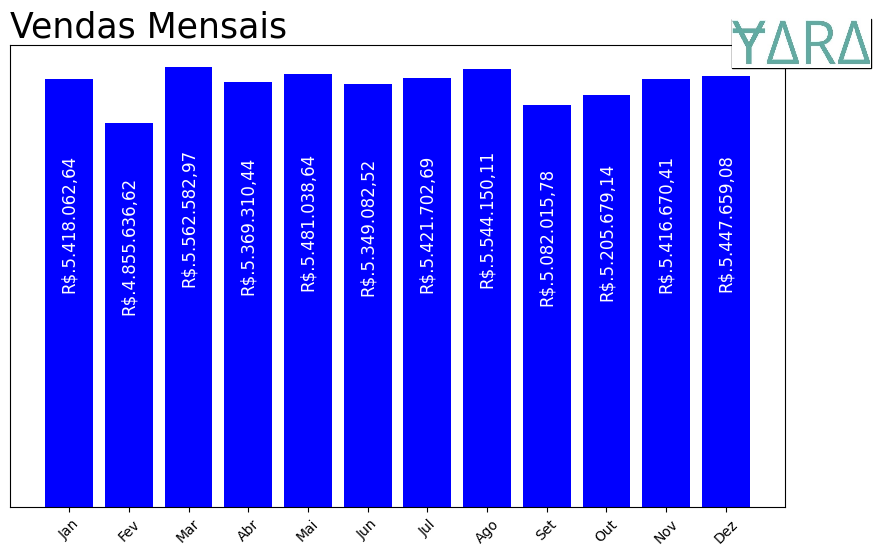

In [143]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Dados de exemplo
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.figure(figsize=(10,6))
barras = plt.bar(meses, VendasPorMes, color='blue')

# Adiciona a logo
logo = mpimg.imread('logo.jpg') # Substitua 'caminho_para_sua_logo.png' pelo caminho real para o arquivo da sua logo
imagebox = OffsetImage(logo, zoom=0.2) # Ajuste o valor de 'zoom' para alterar o tamanho da logo
ab = AnnotationBbox(imagebox, (1.02, 1), xycoords='axes fraction', boxcoords="offset points", pad=0)
plt.gca().add_artist(ab)

# Adiciona rótulos às barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval/2, moeda_brasileira.format(yval).replace(',', ' ').replace('.', ',').replace(' ', '.'), ha='center', va='bottom', rotation=90, color='white', size=12)

plt.title('Vendas Mensais', loc='left',size=25) # Posiciona o título à esquerda
# removendo a poluição visual
plt.xlabel('') # Remove a legenda do rótulo pois o Proprio Rotulo é objetivo se referenciando a Mês
plt.ylabel('') # Remove a legenda da escala pois o Proprio Valor já esta formatado como R$ e o titulo se refere a venda
plt.yticks([]) # Remove a escala de valores
plt.xticks(rotation=45) # Rotaciona os rótulos dos meses

plt.show()
